# Module 1: Radiometry, Shadows, Shading, and Color

This notebook provides an in-depth exploration of topics related to light interaction, shading models, and color physics, along with Python implementations for clarity. The outputs display both the original image and the processed results.

## Radiometry: Measuring Light

**Definition:** Radiometry is the science of measuring electromagnetic radiation, including light, in terms of its power across different wavelengths. It involves concepts like radiance, irradiance, and their spatial distribution.

**Steps Involved:**
1. Acquire an image representing the light distribution.
2. Analyze the intensity values across the image.
3. Visualize the light distribution and intensity histogram.

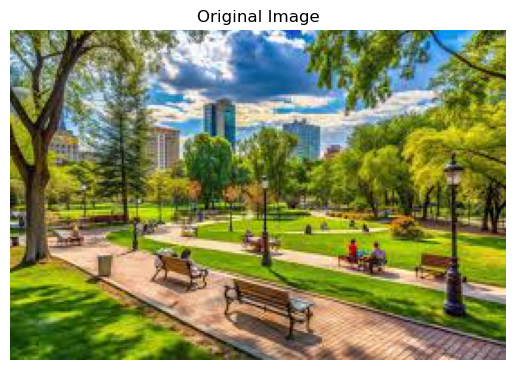

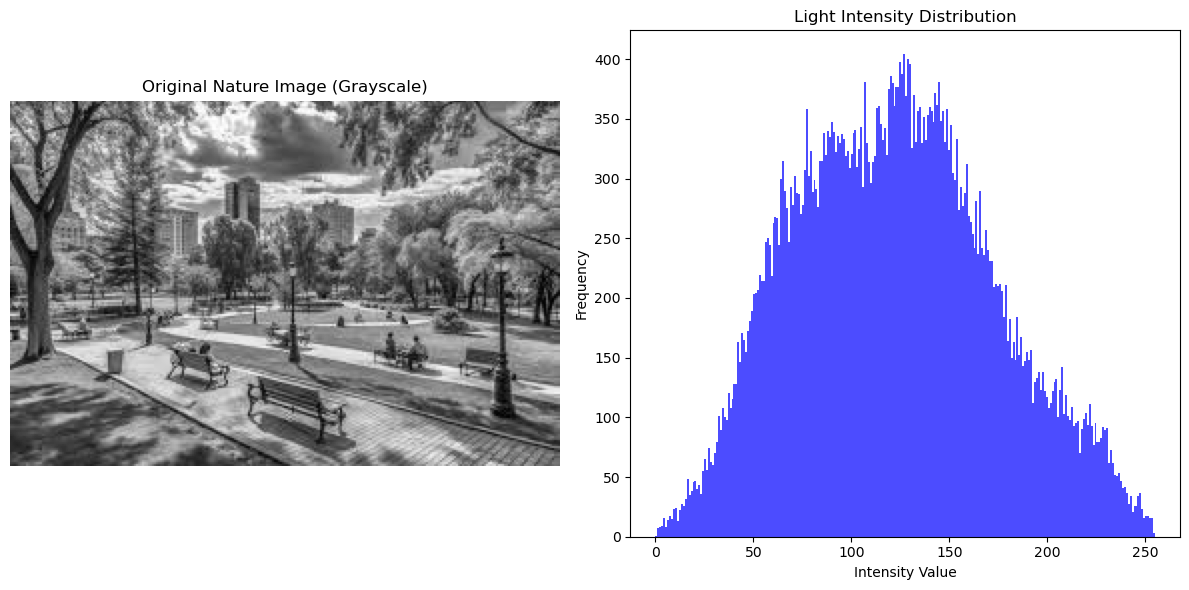

In [1]:
# Example: Visualizing light intensity in an image (Nature scene)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import matplotlib.image as mpimg

# Specify the path to your image
image_path = 'nature_scene.jpg'  # Replace with your image path

# Load the image
img = mpimg.imread(image_path)

# Display the image with title
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')  # Hide axes
plt.show()

# Load the nature image
nature_img = Image.open('nature_scene.jpg').convert('L')  # Convert to grayscale
nature_array = np.array(nature_img)

# Display the original image and intensity map
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(nature_img, cmap='gray')
plt.title('Original Nature Image (Grayscale)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(nature_array.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Light Intensity Distribution')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Shadows and Shading

**Definition:** Shading models describe how light interacts with surfaces, determining the brightness and appearance of objects. Shadows occur where light is obstructed by an object.

**Steps Involved:**
1. Simulate surface intensity variation due to light source placement.
2. Create a gradient-based simulation to represent shading effects.
3. Visualize the results to interpret the shading model.

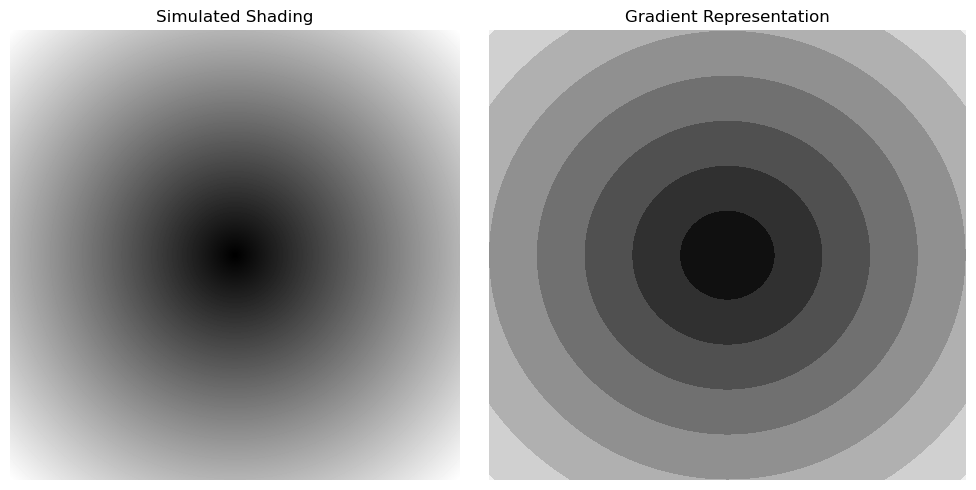

In [2]:
# Example: Simulating a simple shading model (gradient-based)
x, y = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
z = np.sqrt(x**2 + y**2)  # Radial gradient to simulate shading

# Plot the simulated shading along with the gradient
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(z, cmap='gray')
plt.title('Simulated Shading')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.contourf(x, y, z, cmap='gray')
plt.title('Gradient Representation')
plt.axis('off')
plt.tight_layout()
plt.show()

### Qualitative Radiometry

Radiometry deals with the measurement of light and its interaction with surfaces. It involves studying light intensity, reflection types, and surface properties like matte or glossy finishes. The light intensity diminishes as distance from the light source increases, and surfaces reflect light in different ways based on their material properties.

#### Example:
In this example, we simulate how light intensity changes based on distance from a point source and angle of incidence.

We can also see how light behaves differently based on surface types.
ics scenes.

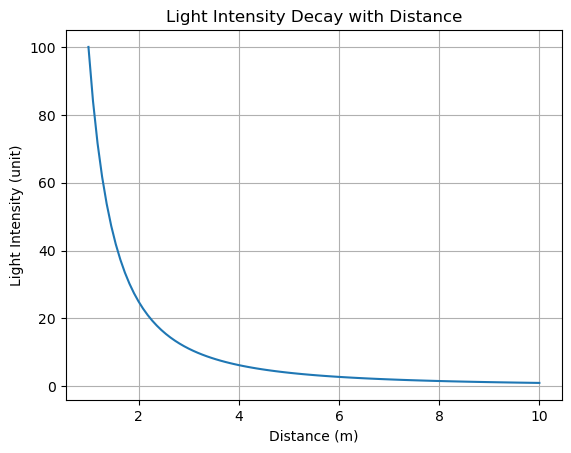

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define light source
light_intensity = 100  # arbitrary unit
distance = np.linspace(1, 10, 100)  # Distance from light source

# Intensity decay with distance
intensity_decay = light_intensity / distance**2

# Plot
plt.plot(distance, intensity_decay)
plt.title('Light Intensity Decay with Distance')
plt.xlabel('Distance (m)')
plt.ylabel('Light Intensity (unit)')
plt.grid(True)
plt.show()


### Sources and Their Effects

Light sources can be classified based on their behavior:
- **Point light**: Emits light from a single point, creating sharp shadows.
- **Directional light**: Emits parallel rays, often used to simulate sunlight.
- **Area light**: Emits light from a region, producing soft shadows.

Here we will simulate how different types of light sources illuminate a flat surface.


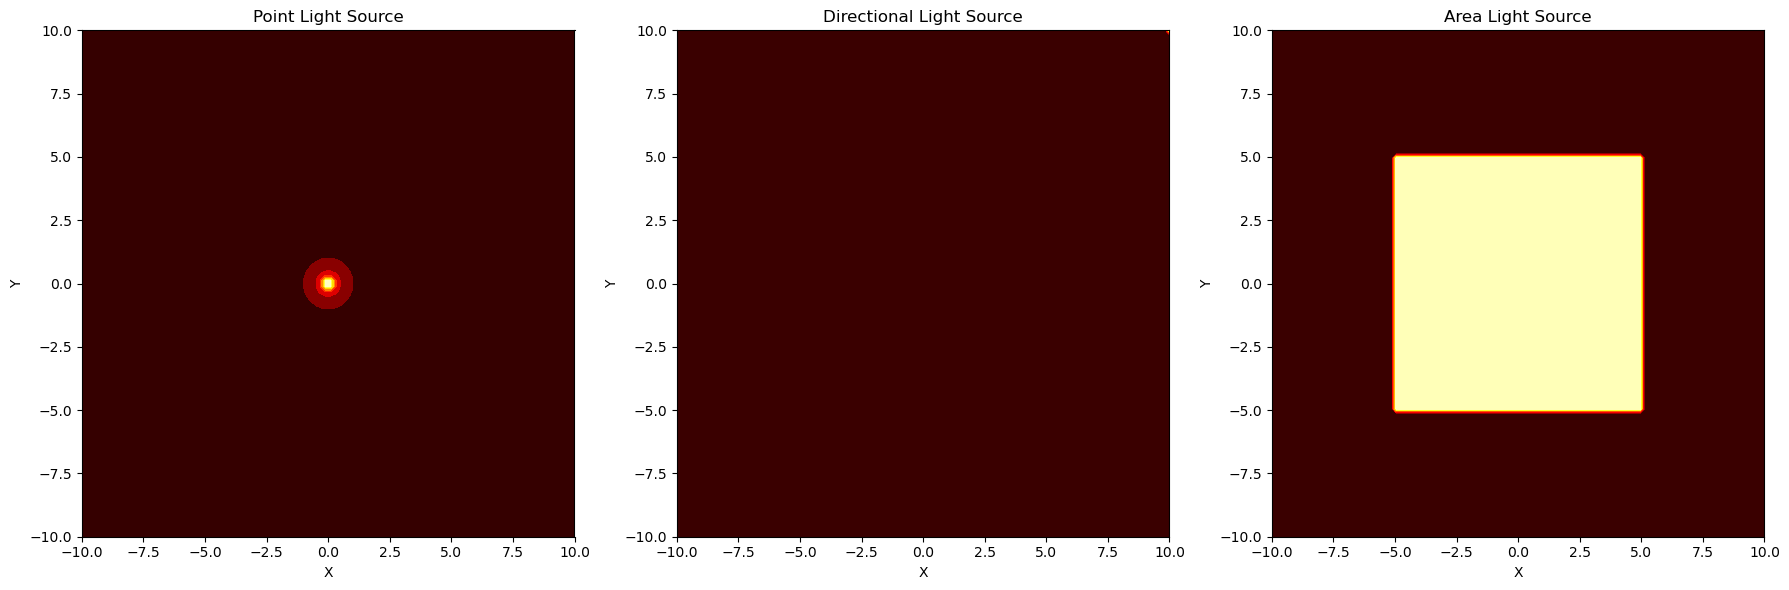

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of points (representing a surface)
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Define light sources
# Point light source at the origin
point_light = np.array([0, 0])

# Directional light source coming from the right
directional_light = np.array([10, 10])

# Area light (light is emitted from a rectangular area)
area_light_origin = np.array([-5, -5])  # bottom-left corner of the area light
area_light_width = 10
area_light_height = 10

# Calculate distance to each point on the surface for different light sources
distance_to_point_light = np.sqrt((X - point_light[0])**2 + (Y - point_light[1])**2)
distance_to_directional_light = np.sqrt((X - directional_light[0])**2 + (Y - directional_light[1])**2)

# Area light intensity: Simulate a uniform light over an area
area_light_mask = np.logical_and(X >= area_light_origin[0], X <= area_light_origin[0] + area_light_width) & \
                  np.logical_and(Y >= area_light_origin[1], Y <= area_light_origin[1] + area_light_height)

# Simulate light intensity falloff (inverse square law for point light, constant for directional)
intensity_point_light = 1 / (distance_to_point_light + 1e-6)  # Avoid division by zero
intensity_directional_light = 1 / (distance_to_directional_light + 1e-6)
intensity_area_light = np.zeros_like(X)
intensity_area_light[area_light_mask] = 1  # Area light is constant within its region

# Plot the results
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Point light plot
ax[0].contourf(X, Y, intensity_point_light, cmap='hot')
ax[0].set_title('Point Light Source')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')

# Directional light plot
ax[1].contourf(X, Y, intensity_directional_light, cmap='hot')
ax[1].set_title('Directional Light Source')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')

# Area light plot
ax[2].contourf(X, Y, intensity_area_light, cmap='hot')
ax[2].set_title('Area Light Source')
ax[2].set_xlabel('X')
ax[2].set_ylabel('Y')

# Show the plots
plt.tight_layout()
plt.show()


### Interreflections: Global Shading

Interreflections occur when light reflects off surfaces and illuminates other surfaces. This effect is often used in realistic rendering techniques, such as radiosity or ray tracing. While full global illumination simulations are complex, we can model a simplified version of light reflecting from one surface to another.

#### Example:
In this example, we'll show how light reflects between two surfaces.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Light source
light_source = np.array([5, 10])  # arbitrary location

# Surface 1: flat plane
surface1 = np.array([0, 0])

# Surface 2: flat plane
surface2 = np.array([3, 0])

# Light intensity decay
def intensity_decay(distance):
    return 1 / (distance**2)

# Simulate reflection by considering distances between light and surfaces
distance1 = np.linalg.norm(light_source - surface1)
distance2 = np.linalg.norm(surface1 - surface2)

intensity1 = intensity_decay(distance1)
intensity2 = intensity_decay(distance2)

print(f"Light intensity on surface 1: {intensity1:.2f}")
print(f"Light intensity on surface 2 due to reflection: {intensity2:.2f}")


Light intensity on surface 1: 0.01
Light intensity on surface 2 due to reflection: 0.11


## The Physics of Color

**Definition:** The physics of color involves understanding how light of different wavelengths interacts with surfaces and is perceived by humans. It focuses on color spaces (e.g., RGB) and how colors are digitally represented.

**Steps Involved:**
1. Split the image into its RGB color channels.
2. Visualize each channel separately to understand its contribution.
3. Reconstruct the original image from the channels.

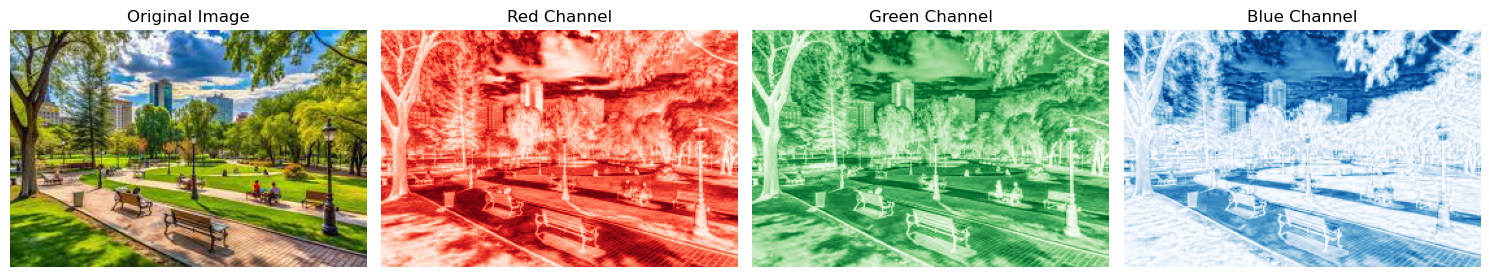

In [6]:
# Example: Splitting an image into RGB channels
nature_img_color = Image.open('nature_scene.jpg')
r, g, b = nature_img_color.split()  # Extract RGB channels

# Display the original image and RGB channels
plt.figure(figsize=(15, 6))
plt.subplot(1, 4, 1)
plt.imshow(nature_img_color)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(r, cmap='Reds')
plt.title('Red Channel')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(g, cmap='Greens')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(b, cmap='Blues')
plt.title('Blue Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

### The Physics of Color

Color perception is based on the wavelength of light:
- **Red**: Longer wavelength (620-750 nm)
- **Green**: Medium wavelength (495-570 nm)
- **Blue**: Shorter wavelength (450-495 nm)

#### Example:
We can visualize how light of different wavelengths corresponds to the primary colors (RGB).


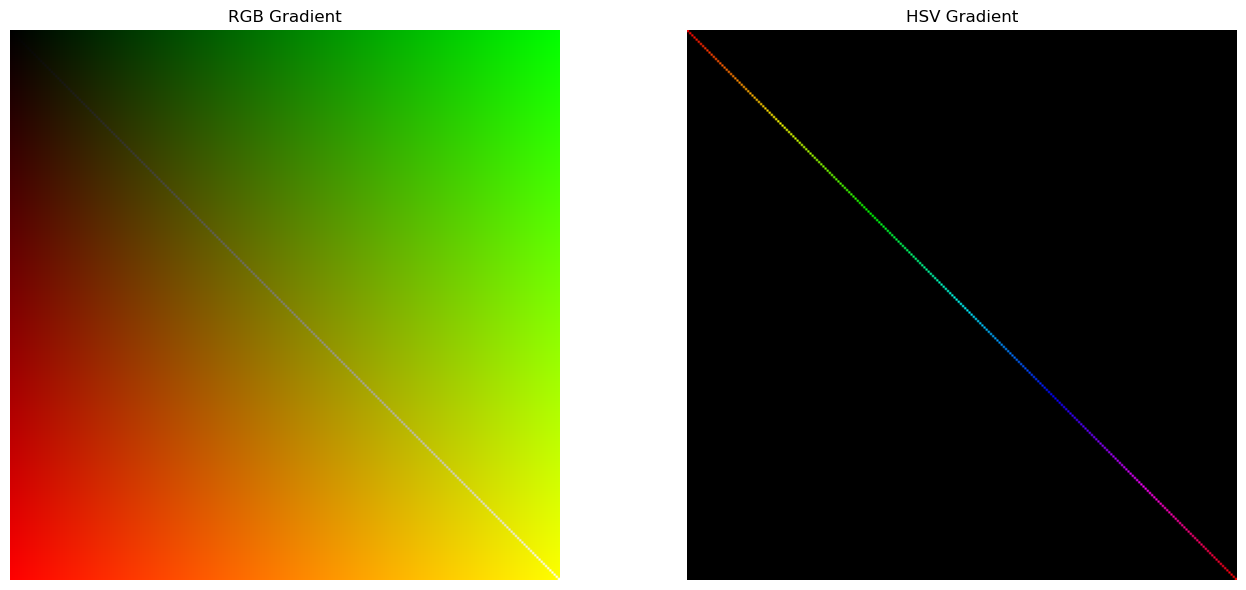

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

# Create a function to display a color gradient in RGB and HSV
def plot_color_models():
    # Create an array of values from 0 to 1 to represent color intensities
    num_steps = 256
    gradient = np.linspace(0, 1, num_steps)
    
    # RGB color gradient (Red, Green, Blue)
    rgb_image = np.zeros((num_steps, num_steps, 3))
    
    for i in range(num_steps):
        rgb_image[i, :, 0] = gradient[i]  # Red channel
        rgb_image[:, i, 1] = gradient[i]  # Green channel
        rgb_image[i, i, 2] = gradient[i]  # Blue channel
    
    # HSV color gradient (Hue, Saturation, Value)
    hsv_image = np.zeros((num_steps, num_steps, 3))
    
    for i in range(num_steps):
        hsv_image[i, :, 0] = gradient[i]  # Hue channel
        hsv_image[:, i, 1] = 1  # Saturation = 1 (full saturation)
        hsv_image[i, i, 2] = 1  # Value = 1 (full brightness)
    
    # Convert HSV to RGB using matplotlib's function
    rgb_from_hsv = hsv_to_rgb(hsv_image)
    
    # Plotting RGB gradient
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].imshow(rgb_image)
    ax[0].set_title("RGB Gradient")
    ax[0].axis('off')
    
    # Plotting HSV gradient
    ax[1].imshow(rgb_from_hsv)
    ax[1].set_title("HSV Gradient")
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display the gradients
plot_color_models()


### Human Color Perception

Humans perceive color based on three types of cone cells in the retina: Red (L), Green (M), and Blue (S). The cones' sensitivity to different wavelengths gives us the ability to perceive a wide spectrum of colors.

#### Example:
We simulate how human cones react to specific wavelengths.


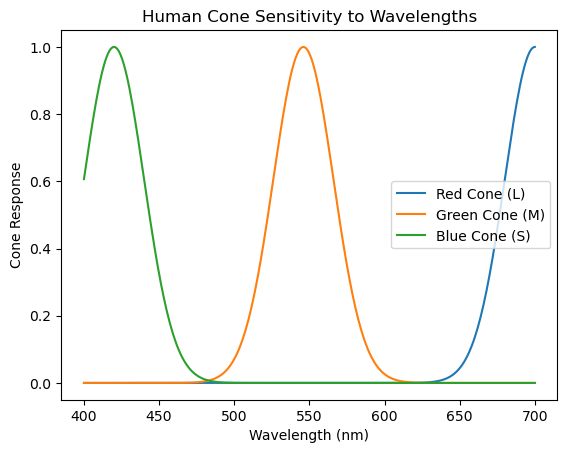

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate cone sensitivity
def cone_response(wavelength, cone_type):
    if cone_type == 'L':  # Long (Red)
        return np.exp(-((wavelength - 700)**2) / (2 * (20**2)))
    elif cone_type == 'M':  # Medium (Green)
        return np.exp(-((wavelength - 546)**2) / (2 * (20**2)))
    elif cone_type == 'S':  # Short (Blue)
        return np.exp(-((wavelength - 420)**2) / (2 * (20**2)))
    else:
        return 0

# Create wavelength range
wavelengths = np.linspace(400, 700, 300)

# Get cone responses
L_cone = np.array([cone_response(w, 'L') for w in wavelengths])
M_cone = np.array([cone_response(w, 'M') for w in wavelengths])
S_cone = np.array([cone_response(w, 'S') for w in wavelengths])

# Plot
plt.plot(wavelengths, L_cone, label='Red Cone (L)')
plt.plot(wavelengths, M_cone, label='Green Cone (M)')
plt.plot(wavelengths, S_cone, label='Blue Cone (S)')
plt.legend()
plt.title('Human Cone Sensitivity to Wavelengths')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Cone Response')
plt.show()
